In [158]:
import bayestuner
from bayestuner.bounds import Bound
from bayestuner.bayestuner import BayesTuner
import numpy as np
from bayestuner.acquisitionfunc import EI
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mayavi import mlab
from sklearn.gaussian_process.kernels import ExpSineSquared, ConstantKernel
mlab.init_notebook()
import sys
%matplotlib notebook

Notebook initialized with ipy backend.


In [159]:
import math
rastringin_ = lambda X : -(10*len(X) + sum([x**2 - 10*np.cos(2*math.pi*x) for x in X]))

In [168]:
def ackley(X,a=20, b=0.2, c=2*np.pi):
    d           =len(X)
    sum_sq_term = -a * np.exp(-b * np.sqrt(sum(X[i]**2 for i in range(d))/d))
    cos_term    = -np.exp(sum(np.cos(c*X[i])/d for i in range(d)))
    return a + np.exp(1) + sum_sq_term + cos_term



ackley_ = lambda X : -ackley(X)

ackley_(np.array([[0,1],[0,0]]))

array([ 4.44089210e-16, -2.63753109e+00])

In [141]:
dim = 2
bounds = [Bound([-32,32],"continuous") for i in range(dim)]

In [146]:
tuner = BayesTuner(objective = ackley_,
                   bounds = bounds,
                   num_iter = 50,
                   num_samples = 15,
                   alpha = 1e-2)

optimum = tuner.tune(print_score = True)

current eval : [20.14602560470111, -5.733227783938947] / score : -20.398478731658614
current eval : [-31.69643237828145, 12.307228607458448] / score : -21.844085666889853
current eval : [32.0, -32.0] / score : -19.96676885453652
current eval : [-22.947809310804026, 3.415812175079324] / score : -20.923944905134398
current eval : [9.168466076255601, -32.0] / score : -20.43112030532469
current eval : [6.477388301403912, -6.7250654014267335] / score : -16.814282606145884
current eval : [20.128673213791423, -27.06194428402392] / score : -20.30542308992051
current eval : [-32.0, 32.0] / score : -19.96676885453652
current eval : [-13.59224908602564, -32.0] / score : -21.486741025167163
current eval : [-32.0, -4.797692362533708] / score : -20.601430360511547
current eval : [19.051127989107478, 8.540127753948006] / score : -20.683882362914733
current eval : [32.0, 32.0] / score : -19.96676885453652
current eval : [3.8053788443192005, 2.4806588915544125] / score : -11.475893759719035
current eva

In [147]:
ackley_(optimum)

-5.204156703331422

In [148]:
X = np.hstack((tuner.past_hyper,tuner.past_evals))

#### OPTICS

In [149]:
from sklearn.cluster import KMeans
OPT = KMeans(n_clusters = 10).fit(X)
print(f"number of clusters : {len(set(OPT.labels_))}")

number of clusters : 10


In [150]:
clusters1 = [[X[i] for i in range(len(X)) if OPT.labels_[i] == j ] for j in set(OPT.labels_)]

<IPython.core.display.Javascript object>


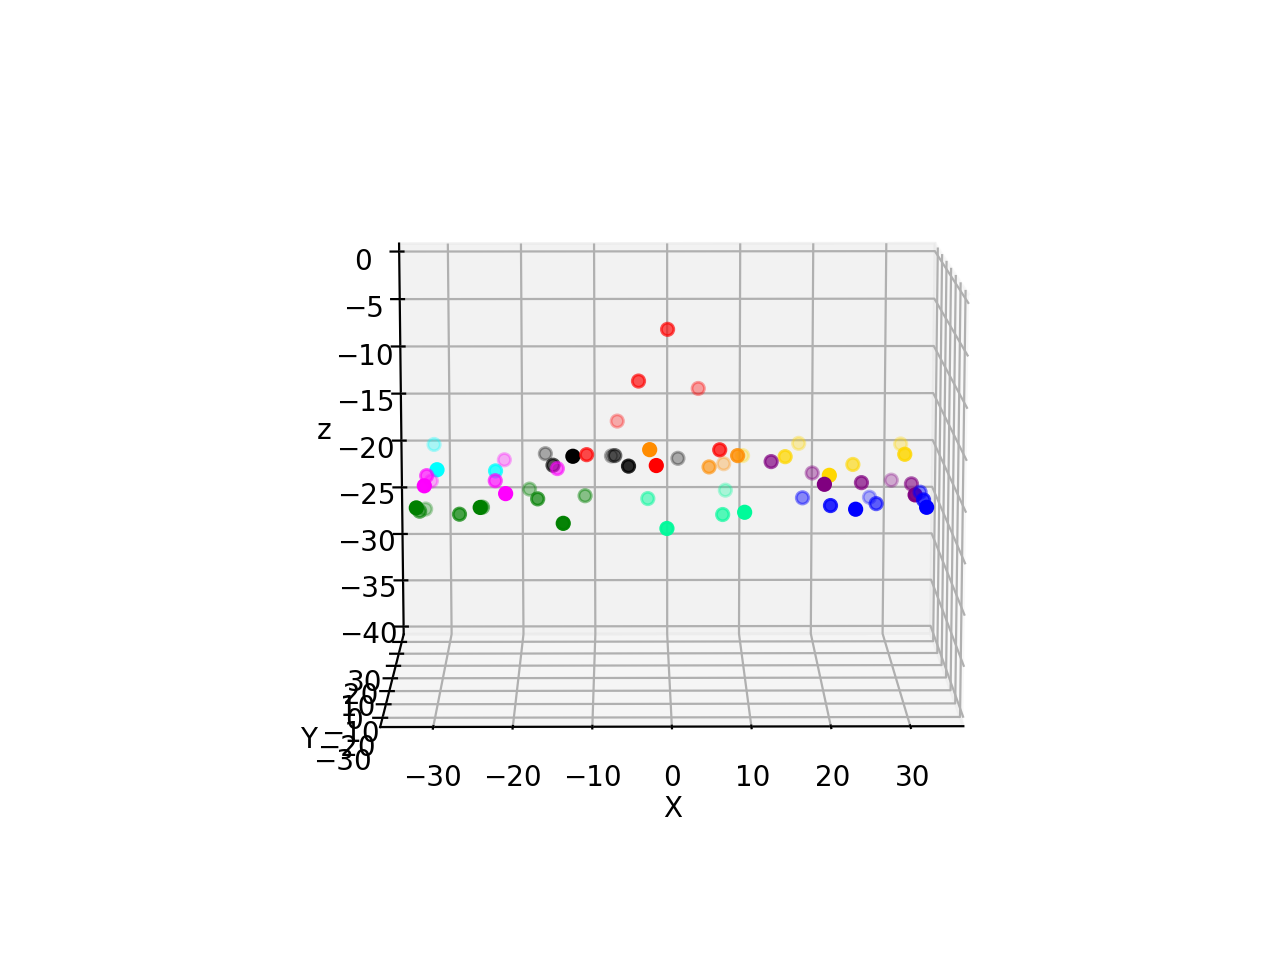

(-40, 0)

In [153]:
fig4 = plt.figure()
ax1 = fig4.add_subplot(111, projection='3d')

colors = ['red','blue','gold','green','black','purple','aqua','fuchsia','darkorange','mediumspringgreen','olive']
for col,clust in zip(colors,clusters1):
    ax1.scatter([clust[j][0] for j in range(len(clust))],
               [clust[j][1] for j in range(len(clust))],
               [clust[j][2] for j in range(len(clust))],c = col)
#ax.scatter(cluster[:,0],cluster[:,1],cluster[:,2],c='r')
ax1.set_xlabel("X")
ax1.set_ylabel("Y")
ax1.set_zlabel("z")
ax1.set_zlim(-40,0)

##### DBscan

In [ ]:



from sklearn.cluster import DBSCAN
from bayestuner.bounds import Bounds
from sklearn.cluster import AgglomerativeClustering

db = DBSCAN(eps = 3,min_samples=3).fit(X)

labels = set(db.labels_)
labels

In [39]:
clusters = [[X[i] for i in range(len(X)) if db.labels_[i] == j ] for j in labels] 

NameError: name 'labels' is not defined

In [90]:
new_hyper = np.array([[x[0],x[1]] for x in clusters[3]])

new_bounds = Bounds([Bound([min(new_hyper[:,0]),max(new_hyper[:,0])],"continuous"),
              Bound([min(new_hyper[:,1]),max(new_hyper[:,1])],"continuous")])

new_evals = np.array([ackley_(x) for x in new_hyper]).reshape(-1,1)


tuner.past_hyper = new_hyper
tuner.bounds = new_bounds
tuner.past_evals = new_evals

tuner.tune(print_score = True)

current eval : [-0.311093963353991, -0.04543536730059311] / score : -2.248258133721114
current eval : [-0.06844625438817308, -0.20516215413625163] / score : -1.5104782594836936
current eval : [-0.38129903054255576, -0.6671534248761244] / score : -4.237661263178942
current eval : [0.2310903194141556, 0.5565020493924935] / score : -3.6880767474717935
current eval : [0.2310903194141556, -0.6532760998785215] / score : -3.787724069553784
current eval : [-0.0044712848996496255, 0.07479789193420791] / score : -0.3547591759319073
current eval : [-0.38129903054255576, -1.113412297465893] / score : -4.77363998519964
current eval : [0.2310903194141556, 0.1637755303987482] / score : -2.1304462882631716
current eval : [-0.16847706886205854, 0.04458242914769045] / score : -1.1392764904501687
current eval : [-0.09747737846853215, 0.382736584881481] / score : -2.7651941982345676
current eval : [0.12499422635060342, -0.31964751161948113] / score : -2.513657005056172
current eval : [0.023531256334895598

array([-0.01064648, -0.01025096])

<IPython.core.display.Javascript object>


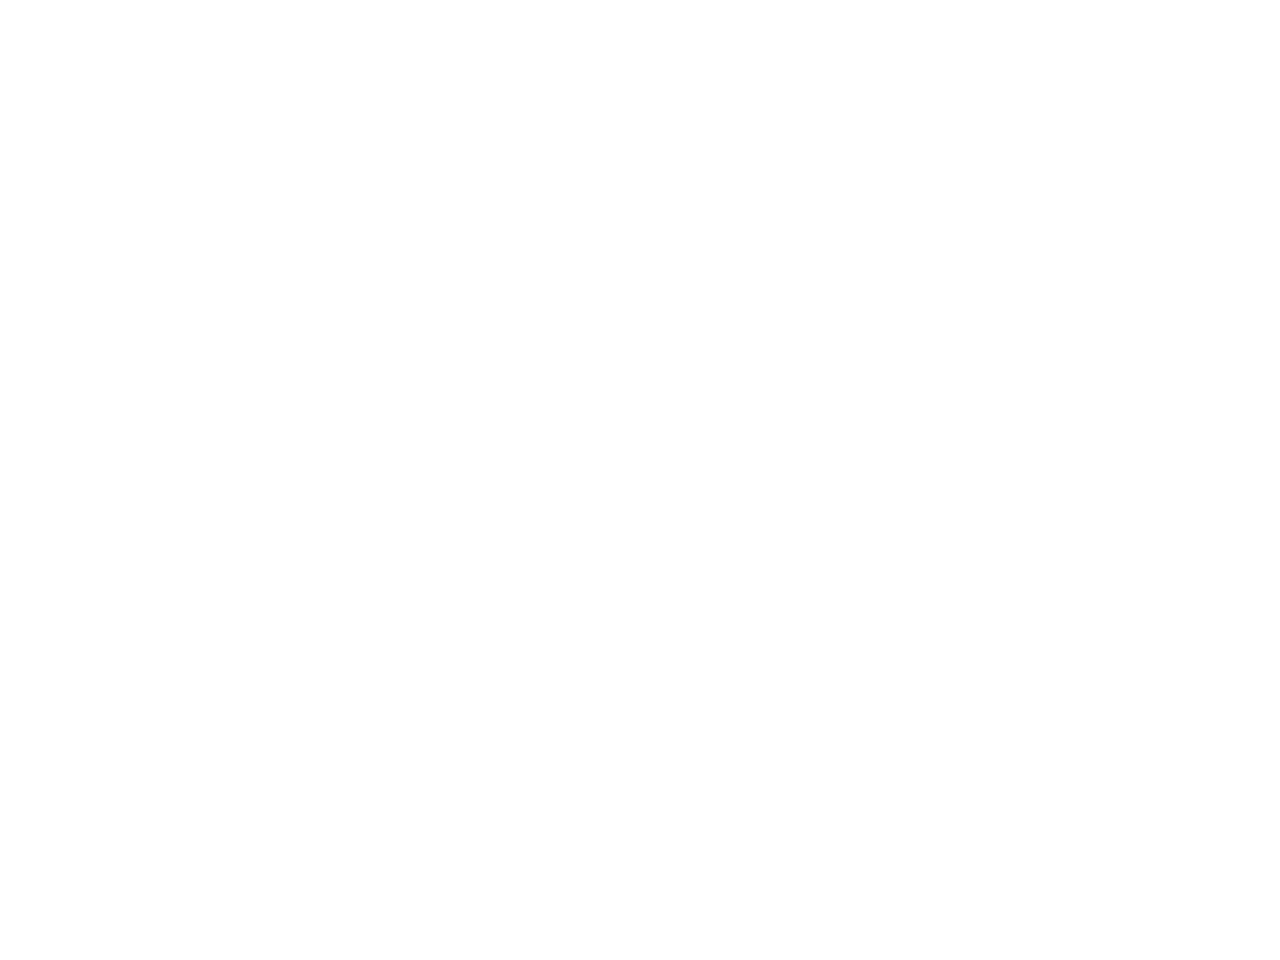

In [104]:
fig3 = plt.figure()
X_ = np.hstack((tuner.past_hyper,tuner.past_evals))
ax1 = fig.add_subplot(111,projection = '3d')
ax1.scatter(X_[:,0],X_[:,1],X_[:,2],c = 'r')

In [59]:
ackley_([ 0.00979318, -0.01391425])

-0.055819999133113196

<IPython.core.display.Javascript object>


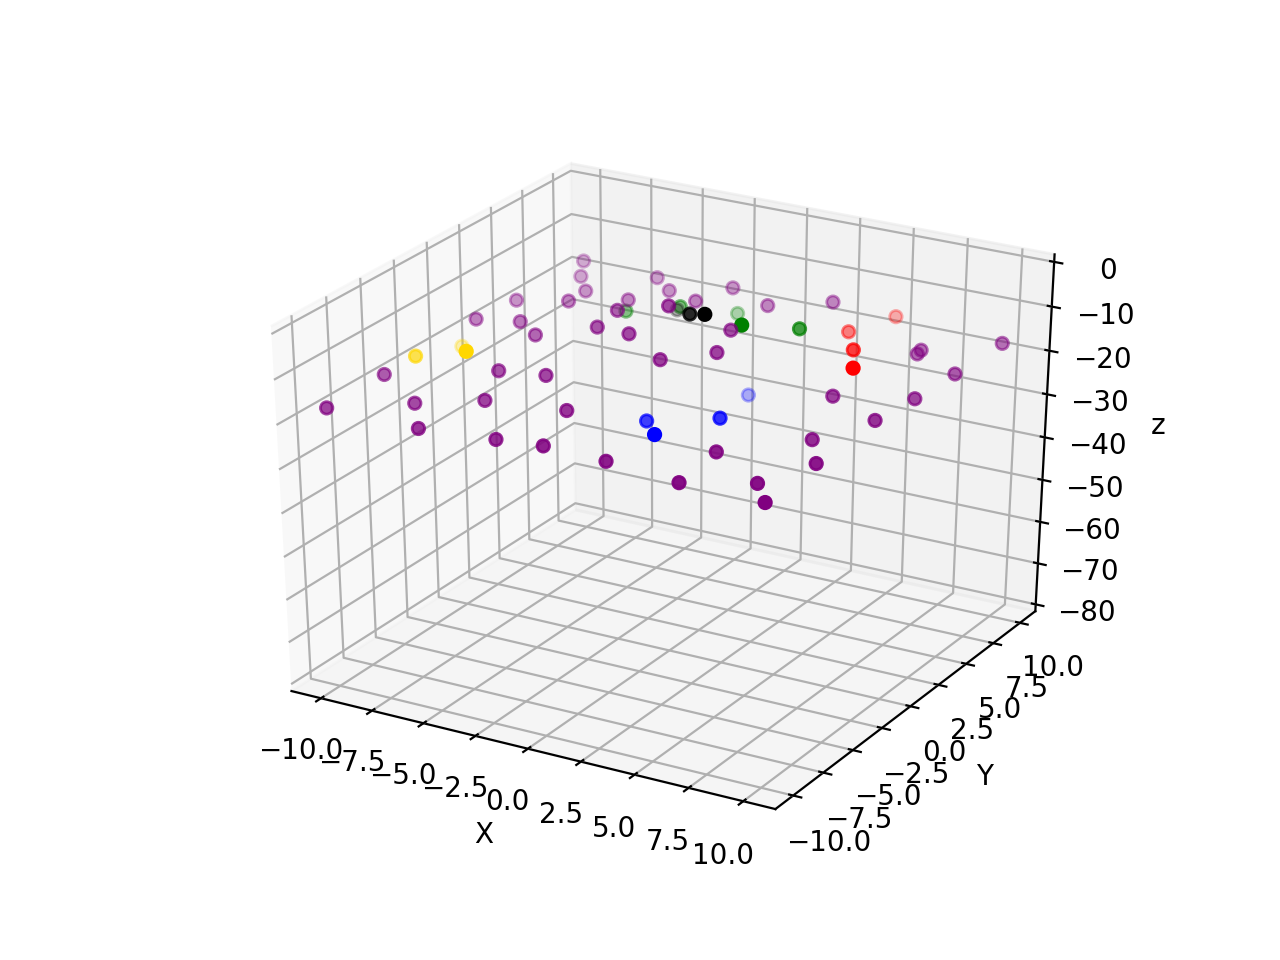

(-80, 0)

In [177]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

colors = ['red','blue','gold','green','black','purple','gold','fuchsia','blueviolet','forestgreen']
for color,cluster in zip(colors,clusters):
    ax.scatter([cluster[j][0] for j in range(len(cluster))],
               [cluster[j][1] for j in range(len(cluster))],
               [cluster[j][2] for j in range(len(cluster))],c = color)
#ax.scatter(cluster[:,0],cluster[:,1],cluster[:,2],c='r')
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("z")
ax.set_zlim(-80,0)

In [161]:
x = y = np.linspace(-5.12,5.12,30)
X, Y = np.meshgrid(x,y)
square = lambda x,y : -x**2 -y**2
rastr_ = lambda x,y : -20 - (x**2 - 10*np.cos(2*math.pi*x)) - (y**2 - 10*np.cos(2*math.pi*y))
ackley_plot = lambda x,y : ackley_(np.array([x,y]))


obj = rastr_

In [21]:
i = j = np.linspace(-5.12,5.12,30)
x_, y_ = np.meshgrid(i,j)
vect = np.hstack((x_.reshape(-1,1),y_.reshape(-1,1)))
y__ = obj(vect[:,0],vect[:,1])

y__.shape


(900,)

In [118]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
gp = GaussianProcessRegressor(kernel = ConstantKernel(1.0)*RBF(),
                              alpha = 1e-2,
                              n_restarts_optimizer = 3)
#gp = gp.fit(vect,y__)
gp = gp.fit(tuner.past_hyper,tuner.past_evals)

fitted_gp = lambda x_,y_ : gp.predict(np.array([x_,y_]).T)
print(fitted_gp([-1.69661413],[-4.70251034]))
gp_ = lambda X : -fitted_gp([X[0]],[X[1]])

[[-51.22933228]]


In [119]:
from scipy.optimize import differential_evolution

print(differential_evolution(gp_,[[-5.12,5.12],[-5.12,5.12]]))

     fun: array([[-13.23849923]])
     jac: array([1.24344979e-05, 6.03961325e-06])
 message: 'Optimization terminated successfully.'
    nfev: 531
     nit: 16
 success: True
       x: array([-1.14526143, -1.49995972])


In [96]:
fitted_gp([0],[0])

array([[-0.10375187]])

In [174]:
mlab.clf()
x, y = np.mgrid[-32:32:100j, -32:32:100j]

r = ackley_plot(x,y)
print(ackley_plot(0,0))
print(r)
z = fitted_gp(np.ravel(x),np.ravel(y)).reshape(x.shape)
mlab.surf(r, warp_scale='auto',opacity = 0.5)
mlab.surf(z,warp_scale = 'auto',colormap = 'magma')

4.440892098500626e-16
[[-19.96676885 -21.46486142 -21.23745837 ... -21.23745837 -21.46486142
  -19.96676885]
 [-21.46486142 -22.13472241 -22.03136131 ... -22.03136131 -22.13472241
  -21.46486142]
 [-21.23745837 -22.03136131 -21.9091682  ... -21.9091682  -22.03136131
  -21.23745837]
 ...
 [-21.23745837 -22.03136131 -21.9091682  ... -21.9091682  -22.03136131
  -21.23745837]
 [-21.46486142 -22.13472241 -22.03136131 ... -22.03136131 -22.13472241
  -21.46486142]
 [-19.96676885 -21.46486142 -21.23745837 ... -21.23745837 -21.46486142
  -19.96676885]]


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…